In [147]:
from __future__ import print_function

import glob
from itertools import chain
import os
import random
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from linformer import Linformer
from PIL import Image
from sklearn.model_selection import train_test_split
from torch.optim.lr_scheduler import StepLR
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets, transforms
from tqdm.notebook import tqdm
import torchvision
import  time 
t = time.time()

from vit_pytorch.efficient import  ViT

In [148]:
# Training settings
batch_size = 32
epochs = 50
lr = 1e-4
gamma = 0.6
seed = 42


In [149]:
device = 'cuda'

In [150]:
train_transforms = transforms.Compose(
    [
        transforms.Resize((224, 224)),
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
    ]
)

val_transforms = transforms.Compose(
    [
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
    ]
)


test_transforms = transforms.Compose(
    [
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
    ]
)

In [151]:
# Set train and valid directory paths
# Tensor Transforms (with Augmentation) and Pytorch Preprocessing:
train_data = torchvision.datasets.ImageFolder("data/train", transform=train_transforms) 
valid_data = torchvision.datasets.ImageFolder("data/valid", transform=val_transforms)
test_data = torchvision.datasets.ImageFolder("data/test", transform=test_transforms)

In [152]:
train_loader = DataLoader(dataset = train_data, batch_size=batch_size, shuffle=True )
valid_loader = DataLoader(dataset = valid_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset = test_data, batch_size=batch_size, shuffle=True)

In [153]:
print(len(train_data), len(train_loader))

5216 163


In [154]:
print(len(valid_data), len(valid_loader))

16 1


In [155]:
##Linformer

efficient_transformer = Linformer(
    dim=128,
    seq_len=49+1,  # 7x7 patches + 1 cls-token
    depth=12,
    heads=8,
    k=64
)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') 
if torch.cuda.is_available():
    model.cuda() 

In [156]:
#Visual Transformer
model = ViT(
    dim=128,
    image_size=224,
    patch_size=32,
    num_classes=2,
    transformer=efficient_transformer,
    channels=3,
).to(device)

In [157]:
# loss function
criterion = nn.CrossEntropyLoss()
# optimizer
optimizer = optim.RAdam(model.parameters(), lr=lr)
# scheduler
scheduler = StepLR(optimizer, step_size=1, gamma=gamma)

In [158]:
for epoch in range(epochs):
    epoch_loss = 0
    epoch_accuracy = 0

    for data, label in tqdm(train_loader):
        data = data.to(device)
        label = label.to(device)

        output = model(data)
        loss = criterion(output, label)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        acc = (output.argmax(dim=1) == label).float().mean()
        epoch_accuracy += acc / len(train_loader)
        epoch_loss += loss / len(train_loader)

    with torch.no_grad():
        epoch_val_accuracy = 0
        epoch_val_loss = 0
        for data, label in valid_loader:
            data = data.to(device)
            label = label.to(device)

            val_output = model(data)
            val_loss = criterion(val_output, label)

            acc = (val_output.argmax(dim=1) == label).float().mean()
            epoch_val_accuracy += acc / len(valid_loader)
            epoch_val_loss += val_loss / len(valid_loader)
            

    print(f"Epoch : {epoch+1} - loss : {epoch_loss:.4f} - acc: {epoch_accuracy:.4f} - val_loss : {epoch_val_loss:.4f} - val_acc: {epoch_val_accuracy:.4f}\n")
    
    torch.save(model, 'pneumonia'+'_model_'+str(epoch)+'.pt')
    

elapsed = time.time() - t

print('Elapsed Time is : %.8f seconds ' % (elapsed))

  0%|          | 0/163 [00:00<?, ?it/s]

Epoch : 1 - loss : 0.5737 - acc: 0.7429 - val_loss : 0.8271 - val_acc: 0.5000



  0%|          | 0/163 [00:00<?, ?it/s]

Epoch : 2 - loss : 0.5447 - acc: 0.7437 - val_loss : 0.6271 - val_acc: 0.5000



  0%|          | 0/163 [00:00<?, ?it/s]

Epoch : 3 - loss : 0.5016 - acc: 0.7592 - val_loss : 0.5356 - val_acc: 0.6250



  0%|          | 0/163 [00:00<?, ?it/s]

Epoch : 4 - loss : 0.4595 - acc: 0.7822 - val_loss : 0.6330 - val_acc: 0.5625



  0%|          | 0/163 [00:00<?, ?it/s]

Epoch : 5 - loss : 0.4262 - acc: 0.8023 - val_loss : 0.5812 - val_acc: 0.7500



  0%|          | 0/163 [00:00<?, ?it/s]

Epoch : 6 - loss : 0.4085 - acc: 0.8100 - val_loss : 0.6220 - val_acc: 0.7500



  0%|          | 0/163 [00:00<?, ?it/s]

Epoch : 7 - loss : 0.3885 - acc: 0.8200 - val_loss : 0.5917 - val_acc: 0.7500



  0%|          | 0/163 [00:00<?, ?it/s]

Epoch : 8 - loss : 0.3787 - acc: 0.8238 - val_loss : 0.6880 - val_acc: 0.7500



  0%|          | 0/163 [00:00<?, ?it/s]

Epoch : 9 - loss : 0.3805 - acc: 0.8271 - val_loss : 0.6772 - val_acc: 0.6250



  0%|          | 0/163 [00:00<?, ?it/s]

Epoch : 10 - loss : 0.3714 - acc: 0.8307 - val_loss : 0.7020 - val_acc: 0.5625



  0%|          | 0/163 [00:00<?, ?it/s]

Epoch : 11 - loss : 0.3678 - acc: 0.8338 - val_loss : 0.6837 - val_acc: 0.5625



  0%|          | 0/163 [00:00<?, ?it/s]

Epoch : 12 - loss : 0.3547 - acc: 0.8321 - val_loss : 0.6396 - val_acc: 0.6250



  0%|          | 0/163 [00:00<?, ?it/s]

Epoch : 13 - loss : 0.3504 - acc: 0.8428 - val_loss : 0.6670 - val_acc: 0.5625



  0%|          | 0/163 [00:00<?, ?it/s]

Epoch : 14 - loss : 0.3293 - acc: 0.8554 - val_loss : 0.7684 - val_acc: 0.6250



  0%|          | 0/163 [00:00<?, ?it/s]

Epoch : 15 - loss : 0.3304 - acc: 0.8503 - val_loss : 0.7389 - val_acc: 0.4375



  0%|          | 0/163 [00:00<?, ?it/s]

Epoch : 16 - loss : 0.3425 - acc: 0.8499 - val_loss : 0.6370 - val_acc: 0.6875



  0%|          | 0/163 [00:00<?, ?it/s]

Epoch : 17 - loss : 0.3380 - acc: 0.8497 - val_loss : 0.7225 - val_acc: 0.5000



  0%|          | 0/163 [00:00<?, ?it/s]

Epoch : 18 - loss : 0.3203 - acc: 0.8623 - val_loss : 0.7565 - val_acc: 0.5625



  0%|          | 0/163 [00:00<?, ?it/s]

Epoch : 19 - loss : 0.3198 - acc: 0.8572 - val_loss : 0.7218 - val_acc: 0.7500



  0%|          | 0/163 [00:00<?, ?it/s]

Epoch : 20 - loss : 0.3213 - acc: 0.8600 - val_loss : 0.6503 - val_acc: 0.6250



  0%|          | 0/163 [00:00<?, ?it/s]

Epoch : 21 - loss : 0.3195 - acc: 0.8530 - val_loss : 0.7536 - val_acc: 0.6250



  0%|          | 0/163 [00:00<?, ?it/s]

Epoch : 22 - loss : 0.3095 - acc: 0.8616 - val_loss : 0.7362 - val_acc: 0.5000



  0%|          | 0/163 [00:00<?, ?it/s]

Epoch : 23 - loss : 0.3128 - acc: 0.8600 - val_loss : 0.8553 - val_acc: 0.5000



  0%|          | 0/163 [00:00<?, ?it/s]

Epoch : 24 - loss : 0.3209 - acc: 0.8606 - val_loss : 0.6371 - val_acc: 0.5625



  0%|          | 0/163 [00:00<?, ?it/s]

Epoch : 25 - loss : 0.3055 - acc: 0.8583 - val_loss : 0.8069 - val_acc: 0.5000



  0%|          | 0/163 [00:00<?, ?it/s]

Epoch : 26 - loss : 0.3180 - acc: 0.8585 - val_loss : 0.9893 - val_acc: 0.4375



  0%|          | 0/163 [00:00<?, ?it/s]

Epoch : 27 - loss : 0.3071 - acc: 0.8660 - val_loss : 0.9725 - val_acc: 0.5000



  0%|          | 0/163 [00:00<?, ?it/s]

Epoch : 28 - loss : 0.3082 - acc: 0.8650 - val_loss : 0.8597 - val_acc: 0.5000



  0%|          | 0/163 [00:00<?, ?it/s]

Epoch : 29 - loss : 0.3015 - acc: 0.8692 - val_loss : 0.8400 - val_acc: 0.5000



  0%|          | 0/163 [00:00<?, ?it/s]

Epoch : 30 - loss : 0.3031 - acc: 0.8662 - val_loss : 0.8272 - val_acc: 0.6250



  0%|          | 0/163 [00:00<?, ?it/s]

Epoch : 31 - loss : 0.3029 - acc: 0.8689 - val_loss : 0.8793 - val_acc: 0.5625



  0%|          | 0/163 [00:00<?, ?it/s]

Epoch : 32 - loss : 0.3019 - acc: 0.8660 - val_loss : 0.8419 - val_acc: 0.5625



  0%|          | 0/163 [00:00<?, ?it/s]

Epoch : 33 - loss : 0.2917 - acc: 0.8744 - val_loss : 0.7994 - val_acc: 0.5625



  0%|          | 0/163 [00:00<?, ?it/s]

Epoch : 34 - loss : 0.2919 - acc: 0.8671 - val_loss : 0.7719 - val_acc: 0.5000



  0%|          | 0/163 [00:00<?, ?it/s]

Epoch : 35 - loss : 0.2990 - acc: 0.8702 - val_loss : 0.8207 - val_acc: 0.5625



  0%|          | 0/163 [00:00<?, ?it/s]

Epoch : 36 - loss : 0.2821 - acc: 0.8719 - val_loss : 0.8093 - val_acc: 0.6250



  0%|          | 0/163 [00:00<?, ?it/s]

Epoch : 37 - loss : 0.2910 - acc: 0.8687 - val_loss : 0.7222 - val_acc: 0.5625



  0%|          | 0/163 [00:00<?, ?it/s]

Epoch : 38 - loss : 0.2794 - acc: 0.8742 - val_loss : 0.8031 - val_acc: 0.5000



  0%|          | 0/163 [00:00<?, ?it/s]

Epoch : 39 - loss : 0.2958 - acc: 0.8683 - val_loss : 0.7827 - val_acc: 0.5625



  0%|          | 0/163 [00:00<?, ?it/s]

Epoch : 40 - loss : 0.2838 - acc: 0.8800 - val_loss : 0.7342 - val_acc: 0.6875



  0%|          | 0/163 [00:00<?, ?it/s]

Epoch : 41 - loss : 0.2819 - acc: 0.8752 - val_loss : 0.6156 - val_acc: 0.7500



  0%|          | 0/163 [00:00<?, ?it/s]

Epoch : 42 - loss : 0.2852 - acc: 0.8769 - val_loss : 0.8354 - val_acc: 0.5625



  0%|          | 0/163 [00:00<?, ?it/s]

Epoch : 43 - loss : 0.2712 - acc: 0.8809 - val_loss : 0.6337 - val_acc: 0.7500



  0%|          | 0/163 [00:00<?, ?it/s]

Epoch : 44 - loss : 0.2775 - acc: 0.8781 - val_loss : 0.7105 - val_acc: 0.6250



  0%|          | 0/163 [00:00<?, ?it/s]

Epoch : 45 - loss : 0.2737 - acc: 0.8815 - val_loss : 0.6681 - val_acc: 0.6250



  0%|          | 0/163 [00:00<?, ?it/s]

Epoch : 46 - loss : 0.2852 - acc: 0.8742 - val_loss : 0.8637 - val_acc: 0.6875



  0%|          | 0/163 [00:00<?, ?it/s]

Epoch : 47 - loss : 0.2703 - acc: 0.8857 - val_loss : 0.7283 - val_acc: 0.6875



  0%|          | 0/163 [00:00<?, ?it/s]

Epoch : 48 - loss : 0.2698 - acc: 0.8809 - val_loss : 0.7683 - val_acc: 0.6250



  0%|          | 0/163 [00:00<?, ?it/s]

Epoch : 49 - loss : 0.2685 - acc: 0.8817 - val_loss : 0.8136 - val_acc: 0.6250



  0%|          | 0/163 [00:00<?, ?it/s]

Epoch : 50 - loss : 0.2625 - acc: 0.8896 - val_loss : 0.8246 - val_acc: 0.5625

Elapsed Time is : 6382.75457287 seconds 


In [165]:
import torch, torchvision
from torchvision import datasets, models, transforms
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import time
from torchsummary import summary
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image

# Test a particular model on a test image

model = torch.load("pneumonia_model_5.pt")


PERFORMANCE EVALUATION OF THE TEST SET (ORIGINAL PNEUMONIA DATASET)


100%|███████████████████████████████████████████| 20/20 [00:12<00:00,  1.67it/s]

Model Prediction
[0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1

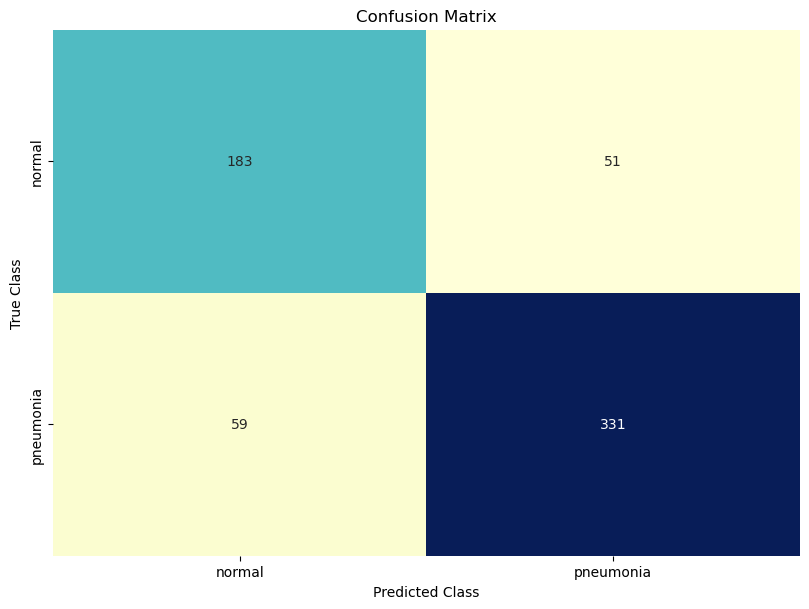

              precision    recall  f1-score   support

           0     0.7562    0.7821    0.7689       234
           1     0.8665    0.8487    0.8575       390

    accuracy                         0.8237       624
   macro avg     0.8113    0.8154    0.8132       624
weighted avg     0.8251    0.8237    0.8243       624



In [166]:
##PERFORMANCE EVALUATION OF THE TEST SET (ORIGINAL PNEUMONIA DATASET)

print('PERFORMANCE EVALUATION OF THE TEST SET (ORIGINAL PNEUMONIA DATASET)')

from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from tqdm import tqdm


y_true = []
y_pred = []

for data in tqdm(test_loader):
  images,labels=data[0].to(device),data[1]  
  y_true.extend(labels.numpy())

  outputs=model(images)

  _, predicted = torch.max(outputs, 1)
  y_pred.extend(predicted.cpu().numpy())

print("Model Prediction")
print(y_pred)


print("Actual Output or Ground Truth")
print(y_true)

cf_matrix = confusion_matrix(y_true, y_pred)

class_names = ('normal', 'pneumonia')
 
# Create pandas dataframe
dataframe = pd.DataFrame(cf_matrix, index=class_names, columns=class_names)

plt.figure(figsize=(8, 6))
 
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None,cmap="YlGnBu",fmt="d")
 
plt.title("Confusion Matrix"), plt.tight_layout()
 
plt.ylabel("True Class"), 
plt.xlabel("Predicted Class")
plt.show()

#Classification report for the test data (ORIGINAL DATA)

CR_test = classification_report(y_true, y_pred, digits=4)

print(CR_test)
      
        

PERFORMANCE EVALUATION OF THE VALIDATION SET


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  3.20it/s]


Model Prediction
[0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0]
Actual Output or Ground Truth
[0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0]


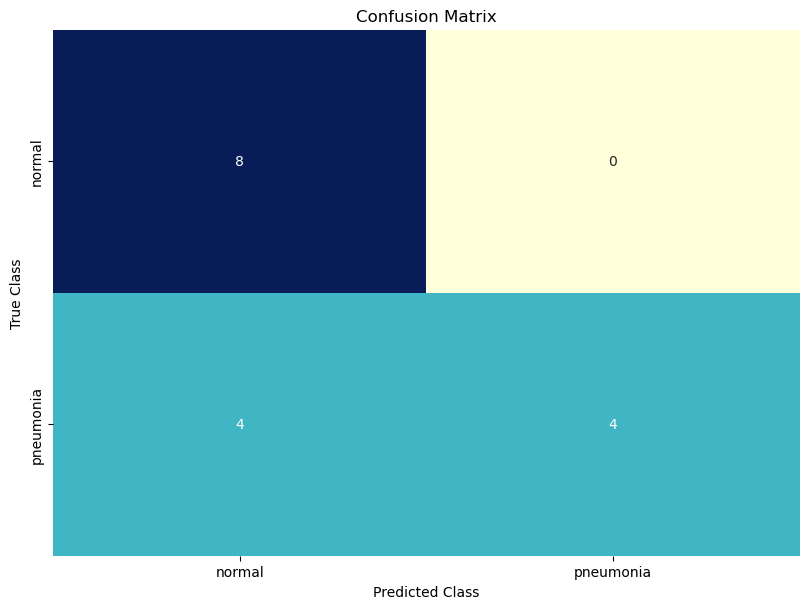

              precision    recall  f1-score   support

           0     0.6667    1.0000    0.8000         8
           1     1.0000    0.5000    0.6667         8

    accuracy                         0.7500        16
   macro avg     0.8333    0.7500    0.7333        16
weighted avg     0.8333    0.7500    0.7333        16



In [167]:
# %%
#PERFORMANCE EVALUATION OF THE VALIDATION SET

print('PERFORMANCE EVALUATION OF THE VALIDATION SET')

from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from tqdm import tqdm



y_true = []
y_pred = []

for data in tqdm(valid_loader):
  images,labels=data[0].to(device),data[1]  
  y_true.extend(labels.numpy())

  outputs=model(images)

  _, predicted = torch.max(outputs, 1)
  y_pred.extend(predicted.cpu().numpy())

print("Model Prediction")
print(y_pred)


print("Actual Output or Ground Truth")
print(y_true)

cf_matrix = confusion_matrix(y_true, y_pred)

class_names = ('normal', 'pneumonia')
 
# Create pandas dataframe
dataframe = pd.DataFrame(cf_matrix, index=class_names, columns=class_names)

plt.figure(figsize=(8, 6))
 
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None,cmap="YlGnBu",fmt="d")
 
plt.title("Confusion Matrix"), plt.tight_layout()
 
plt.ylabel("True Class"), 
plt.xlabel("Predicted Class")
plt.show()

#Classification report for the test data (ORIGINAL DATA)

CR_validation = classification_report(y_true, y_pred, digits=4)

print(CR_validation)


In [164]:
import  gradio as  gr
import torch
from torchvision import transforms
from PIL import Image
import numpy as np


#Load the trained weights
model = torch.load("pneumonia_model_5.pt")



class_labels = [ 'NORMAL', 'PNEUMONIA']


norm_mean = (0.485, 0.456, 0.406)
norm_std = (0.229, 0.224, 0.225)

transform = transforms.Compose([ # resize image to the network input size
                  transforms.RandomResizedCrop(size=256, scale=(0.8, 1.0)),
                  transforms.RandomRotation(degrees=15),
                  transforms.RandomHorizontalFlip(),
                  transforms.CenterCrop(size=224),
                  transforms.ToTensor(),
                  transforms.Normalize(norm_mean, norm_std)
                  ])


def predict_lungs(img):
    
    #Classification of Lungs Disease
    img = Image.fromarray(img.astype('uint8'), 'RGB')
    test_image_tensor = transform(img)
    if torch.cuda.is_available():
        test_image_tensor = test_image_tensor.view(1, 3, 224, 224).cuda()
    else:
        test_image_tensor = test_image_tensor.view(1, 3, 224, 224)
    
    with torch.no_grad():
         # probabilities of all classes
        prediction = torch.nn.functional.softmax(model(test_image_tensor)[0], dim=0)
        
  # class with hightest probability
    pred = torch.argmax(model(test_image_tensor)[0], dim=0) 
  # diagnostic suggestions
    if pred == 1:
        suggestion = "Consult your medical doctor for treatment!"
    else:
        suggestion = "Nothing to be worried about."
        
    return {class_labels[i]: float(prediction[i]) for i in range(2)}, suggestion 

inputs = gr.inputs.Image()
outputs = [gr.outputs.Label(num_top_classes=2, label="Predict Result"), gr.outputs.Textbox(label="Medical Recommendation") ] #, gr.outputs.Image(type='numpy', label="GRADCAM")]
gr.Interface(fn=predict_lungs, 
             inputs=inputs, 
             outputs=outputs, 
             title="Chest X-Ray Diagnostic Application Tool",
             description="A diagnostic medical tool that predicts the existence of pneumonia in an X-ray image",
             interpretation="default"
).launch()

/home/emmanuel-okafor/anaconda3/lib/python3.10/site-packages/gradio/inputs.py:259: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/home/emmanuel-okafor/anaconda3/lib/python3.10/site-packages/gradio/inputs.py:262: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(
/home/emmanuel-okafor/anaconda3/lib/python3.10/site-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/home/emmanuel-okafor/anaconda3/lib/python3.10/site-packages/gradio/outputs.py:200: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  super().__init__(num_top_classes=num_top_classes, type=type, label=label)
/home/emmanuel-okafor/anaconda3/lib/python3.10/site-packages/gradio/outputs.py:22: User

Running on local URL:  http://127.0.0.1:7862

To create a public link, set `share=True` in `launch()`.
